# Loan Datset Exploration
## by (Adetola Oladipo)

## Introduction
> Looking into Loan dataset to get insights on relationships amongst features.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
LoanData=pd.read_csv('prosperLoanData.csv')
LoanData.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [3]:
LoanData.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
loan_columns = [ 'EmploymentStatus','Occupation','LoanStatus','StatedMonthlyIncome','IncomeVerifiable','LoanOriginalAmount','LoanOriginationDate', 'CreditGrade','IsBorrowerHomeowner','IncomeRange',
          'Term','AvailableBankcardCredit', 'BorrowerRate','BorrowerState']
LoanData_df=LoanData[loan_columns]

In [5]:
LoanData_df.head(20)

EmploymentStatus           Occupation            LoanStatus  \
0     Self-employed                Other             Completed   
1          Employed         Professional               Current   
2     Not available                Other             Completed   
3          Employed        Skilled Labor               Current   
4          Employed            Executive               Current   
5          Employed         Professional               Current   
6          Employed       Sales - Retail               Current   
7          Employed              Laborer               Current   
8          Employed         Food Service               Current   
9          Employed         Food Service               Current   
10         Employed              Fireman               Current   
11        Full-time      Waiter/Waitress             Completed   
12         Employed       Sales - Retail  Past Due (1-15 days)   
13         Employed         Construction               Current   
14         Employed  Computer Programmer               Current   
15            Other                Other             Defaulted   
16        Full-time         Professional               Current   
17    Not available         Professional            Chargedoff   
18         Employed   Sales - Commission               Current   
19         Employed              Laborer               Current   

    StatedMonthlyIncome  IncomeVerifiable  LoanOriginalAmount  \
0           3083.333333              True                9425   
1           6125.000000              True               10000   
2           2083.333333              True                3001   
3           2875.000000              True               10000   
4           9583.333333              True               15000   
5           8333.333333              True               15000   
6           2083.333333              True                3000   
7           3355.750000              True               10000   
8           3333.333333              True               10000   
9           3333.333333              True               10000   
10          7500.000000              True               13500   
11          1666.666667              True                1000   
12          2416.666667              True                4000   
13          5833.333333              True                8500   
14         10833.333333              True               19330   
15          5500.000000              True                4000   
16          8291.666667              True                4000   
17          5833.333333              True               10000   
18          6250.000000              True               15000   
19          3075.000000              True                6500   

    LoanOriginationDate CreditGrade  IsBorrowerHomeowner     IncomeRange  \
0   2007-09-12 00:00:00           C                 True  $25,000-49,999   
1   2014-03-03 00:00:00         NaN                False  $50,000-74,999   
2   2007-01-17 00:00:00          HR                False   Not displayed   
3   2012-11-01 00:00:00         NaN                 True  $25,000-49,999   
4   2013-09-20 00:00:00         NaN                 True       $100,000+   
5   2013-12-24 00:00:00         NaN                 True       $100,000+   
6   2013-04-18 00:00:00         NaN                False  $25,000-49,999   
7   2013-05-13 00:00:00         NaN                False  $25,000-49,999   
8   2013-12-12 00:00:00         NaN                 True  $25,000-49,999   
9   2013-12-12 00:00:00         NaN                 True  $25,000-49,999   
10  2012-05-17 00:00:00         NaN                False  $75,000-99,999   
11  2007-10-18 00:00:00           C                False       $1-24,999   
12  2014-01-07 00:00:00         NaN                False  $25,000-49,999   
13  2013-07-18 00:00:00         NaN                 True  $50,000-74,999   
14  2013-05-13 00:00:00         NaN                False       $100,000+   
15  2012-04-19 00:00:00         Na


### What is the structure of your dataset?

> The Loan data-set contains 113,937 loans with 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> What factors affect Loan's outcome status?
> What factors affect borrowers's Interest Rate?
> Are there differences between loans depending on the state or month loan was taken?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features include EmploymentStatus,Occupation,LoanStatus,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,LoanOriginationDate, CreditGrade,IsBorrowerHomeowner,IncomeRange,
          Term,AvailableBankcardCredit, BorrowerRate,BorrowerState

## Univariate Exploration



In [6]:
# checking the distribution on the dataset


LoanData_df.hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC073B9AC8>,
      dtype=object)

In [8]:
# Extracting the month from the LoanMonth column

LoanData_df['LoanMonth']=LoanData_df['LoanOriginationDate'].apply(lambda x: x[5:7] )
LoanData_df['LoanMonth']=LoanData_df['LoanMonth'].astype(int)
LoanData_df['BorrowerState'].replace('Unknown','Non',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

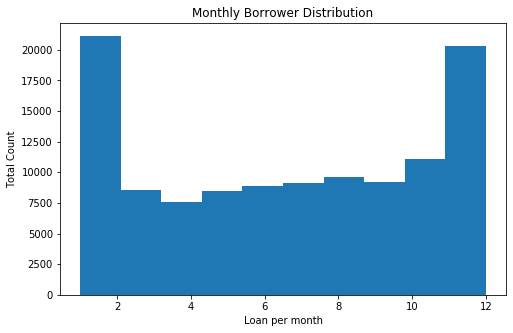

In [9]:
#plotting the number of loan

plt.figure(figsize = [8, 5]) 
plt.hist(data = LoanData_df, x = 'LoanMonth')
plt.xlabel('Loan per month')
plt.ylabel('Total Count')
plt.title('Monthly Borrower Distribution');


> This plot shows that people borrow loans more often towards the begining and ending of the year

In [10]:
base_color = sb.color_palette()[0]

IncomeRange_sort= LoanData_df['EmploymentStatus'].value_counts().sort_values(ascending = True)
IncomeRange_sort.plot(kind = 'barh', grid = False)
plt.title('Employment Status Distribution')
plt.ylabel('Employment Status')
plt.xlabel('No of Loans');

> This shows us how that the employed categories take more loans than any other group.

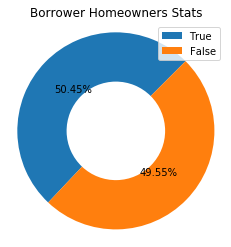

In [76]:
# Analysis on percenatge of home owners 

textprops = {"fontsize":10}
IsHomeowner = pd.DataFrame(LoanData_df['IsBorrowerHomeowner'].value_counts())
labels=LoanData_df['IsBorrowerHomeowner'].unique()

plt.pie(data = IsHomeowner, x='IsBorrowerHomeowner', labels = None, startangle = 45,wedgeprops = {'width': 0.5}, autopct='%.2f%%');
plt.axis('square');
plt.title('Borrower Homeowners Stats')
plt.legend(labels);





> There is a just a slight difference in percentage of borrowers with houses compared to borrowers without a house.

This shows a the percentage difference between home owners to non homeowners is little amongst the borrowers

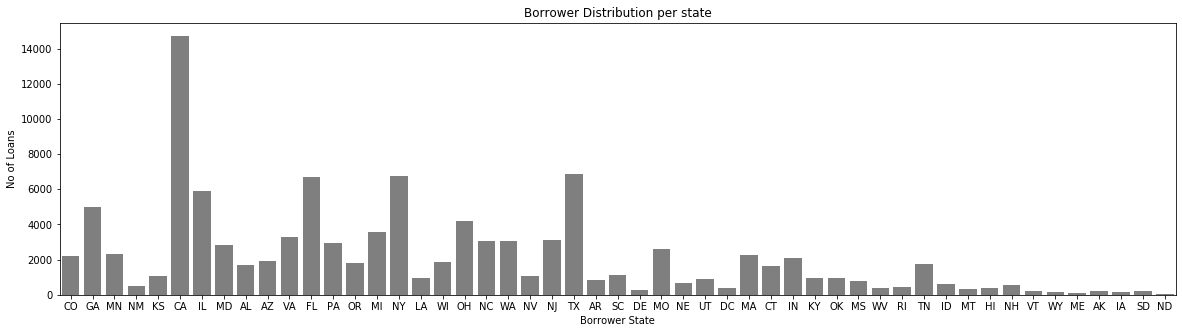

In [13]:
# Plotting the distribution of loan borrowes acrosss state

plt.figure(figsize = [20, 5]) 

base_color = sb.color_palette()[7]
sb.countplot(data = LoanData_df, x = 'BorrowerState', color = base_color)

plt.xlabel('Borrower State')
plt.ylabel('No of Loans')
plt.title('Borrower Distribution per state');

> People from CA took the most number og loans while ND borrowers almost seems not to exist.

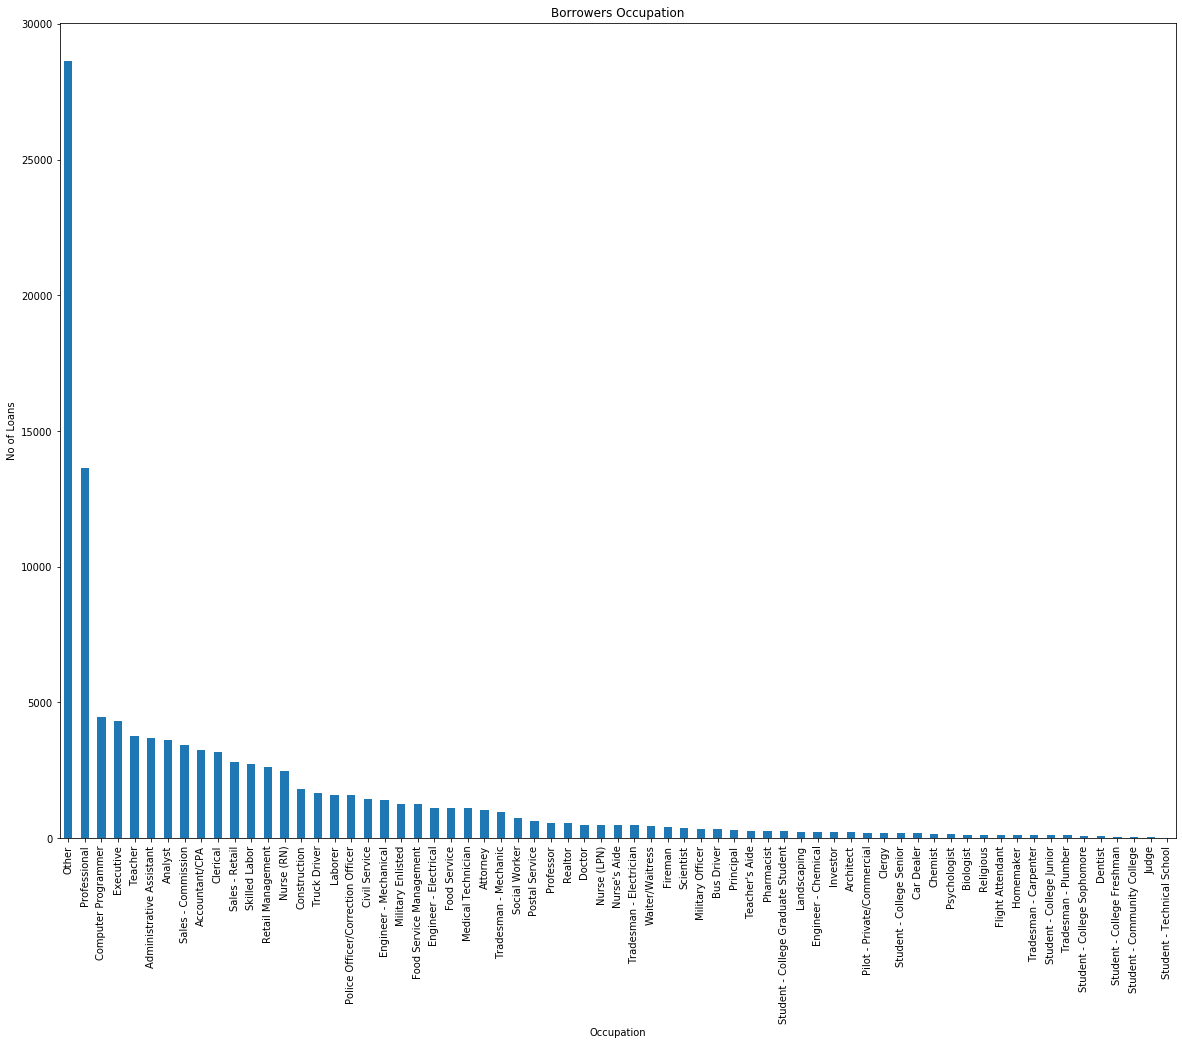

In [14]:
#Borrowers occupation distrubution


plt.figure(figsize = [20, 15]) 

occupation_order = LoanData_df.Occupation.value_counts().sort_values(ascending = False)

occupation_order.plot(kind = 'bar', grid = False)
plt.xticks(rotation = 90)
plt.xlabel('Occupation')
plt.ylabel('No of Loans')
plt.title('Borrowers Occupation');

> Occupation grouped as other has the hightest loan count.

In [26]:
LoanData_df.head(10)

EmploymentStatus      Occupation LoanStatus  StatedMonthlyIncome  \
0    Self-employed           Other  Completed          3083.333333   
1         Employed    Professional  Completed          6125.000000   
2    Not available           Other  Completed          2083.333333   
3         Employed   Skilled Labor  Completed          2875.000000   
4         Employed       Executive  Completed          9583.333333   
5         Employed    Professional  Completed          8333.333333   
6         Employed  Sales - Retail  Completed          2083.333333   
7         Employed         Laborer  Completed          3355.750000   
8         Employed    Food Service  Completed          3333.333333   
9         Employed    Food Service  Completed          3333.333333   

   IncomeVerifiable  LoanOriginalAmount  LoanOriginationDate CreditGrade  \
0              True                9425  2007-09-12 00:00:00           C   
1              True               10000  2014-03-03 00:00:00         NaN   
2              True                3001  2007-01-17 00:00:00          HR   
3              True               10000  2012-11-01 00:00:00         NaN   
4              True               15000  2013-09-20 00:00:00         NaN   
5              True               15000  2013-12-24 00:00:00         NaN   
6              True                3000  2013-04-18 00:00:00         NaN   
7              True               10000  2013-05-13 00:00:00         NaN   
8              True               10000  2013-12-12 00:00:00         NaN   
9              True               10000  2013-12-12 00:00:00         NaN   

   IsBorrowerHomeowner     IncomeRange  Term  AvailableBankcardCredit  \
0                 True  $25,000-49,999    36                   1500.0   
1                False  $50,000-74,999    36                  10266.0   
2                False   Not displayed    36                      NaN   
3                 True  $25,000-49,999    36                  30754.0   
4                 True       $100,000+    36                    695.0   
5                 True       $100,000+    60                  86509.0   
6                False  $25,000-49,999    36                   1929.0   
7                False  $25,000-49,999    36                   2181.0   
8                 True  $25,000-49,999    36                  77696.0   
9                 True  $25,000-49,999    36                  77696.0   

   BorrowerRate BorrowerState  LoanMonth  
0        0.1580            CO          9  
1        0.0920            CO          3  
2        0.2750            GA          1  
3        0.0974            GA         11  
4        0.2085            MN          9  
5        0.1314            NM         12  
6        0.2712            KS          4  
7        0.2019            CA          5  
8        0.0629            IL         12  
9        0.0629            IL         12

In [20]:
#Loans with completed status
LoanData_df[LoanData_df['LoanStatus']=='Completed']

EmploymentStatus               Occupation LoanStatus  \
0         Self-employed                    Other  Completed   
1              Employed             Professional  Completed   
2         Not available                    Other  Completed   
3              Employed            Skilled Labor  Completed   
4              Employed                Executive  Completed   
...                 ...                      ...        ...   
113932         Employed  Food Service Management  Completed   
113933         Employed             Professional  Completed   
113934         Employed                    Other  Completed   
113935        Full-time             Food Service  Completed   
113936         Employed                Professor  Completed   

        StatedMonthlyIncome  IncomeVerifiable  LoanOriginalAmount  \
0               3083.333333              True                9425   
1               6125.000000              True               10000   
2               2083.333333              True                3001   
3               2875.000000              True               10000   
4               9583.333333              True               15000   
...                     ...               ...                 ...   
113932          4333.333333              True               10000   
113933          8041.666667              True                2000   
113934          2875.000000              True               10000   
113935          3875.000000              True               15000   
113936          4583.333333              True                2000   

        LoanOriginationDate CreditGrade  IsBorrowerHomeowner     IncomeRange  \
0       2007-09-12 00:00:00           C                 True  $25,000-49,999   
1       2014-03-03 00:00:00         NaN                False  $50,000-74,999   
2       2007-01-17 00:00:00          HR                False   Not displayed   
3       2012-11-01 00:00:00         NaN                 True  $25,000-49,999   
4       2013-09-20 00:00:00         NaN                 True       $100,000+   
...                     ...         ...                  ...             ...   
113932  2013-04-22 00:00:00         NaN                 True  $50,000-74,999   
113933  2011-11-07 00:00:00         NaN                 True  $75,000-99,999   
113934  2013-12-23 00:00:00         NaN                 True  $25,000-49,999   
113935  2011-11-21 00:00:00         NaN                 True  $25,000-49,999   
113936  2014-01-21 00:00:00         NaN                False  $50,000-74,999   

        Term  AvailableBankcardCredit  BorrowerRate BorrowerState  LoanMonth  
0         36                   1500.0        0.1580            CO          9  
1         36                  10266.0        0.0920            CO          3  
2         36                      NaN        0.2750            GA          1  
3         36                  30754.0        0.0974            GA         11  
4         36                    695.0        0.2085            MN          9  
...      ...                      ...           ...           ...        ...  
113932    36                   1886.0        0.1864            IL          4  
113933    36                   6658.0        0.1110            PA         11  
113934    60                   7853.0        0.2150            TX         12  
113935    60                   4137.0        0.2605            GA         11  
113936    36                    675.0        0.1039            NY          1  

[113937 rows x 15 columns]

In [21]:
LoanData_df['LoanStatus'].value_counts().sort_values()

Cancelled                     5
Past Due (>120 days)         16
FinalPaymentInProgress      205
Past Due (16-30 days)       265
Past Due (91-120 days)      304
Past Due (61-90 days)       313
Past Due (31-60 days)       363
Past Due (1-15 days)        806
Defaulted                  5018
Chargedoff                11992
Completed                 38074
Current                   56576
Name: LoanStatus, dtype: int64

In [98]:
# convert LoanStatus, EmploymentStatus,CreditGrade into ordered categorical types
rearranged = {'LoanStatus': ['Current','Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled',
                              'Chargedoff','Defaulted'],
               
                 'IncomeRange': ["$0","$1-24999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"],
                 'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR','NC']}

for x in rearranged:
    ordered_cols = pd.api.types.CategoricalDtype(ordered = True,categories = rearranged[x])
    LoanData_df[x] = LoanData_df[x].astype(ordered_cols)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


No handles with labels found to put in legend.


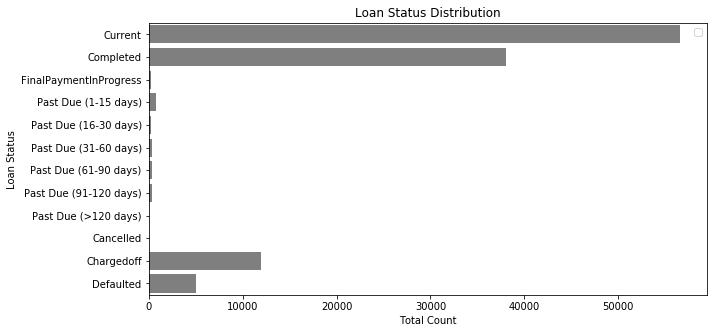

In [93]:
# # Analysis on Loan Status
Loan_Status=LoanData_df['LoanStatus']
# plt.figure(figsize = [10, 5]) 
# #Loan_Status.plot(kind = 'barh')
# plt.bar(x=Loan_Status,height=100)
# plt.ylabel('Loan Status')
# plt.xlabel('Total Count')
# plt.title('Loan Status Distribution');


plt.figure(figsize = [10, 5]) 

base_color = sb.color_palette()[7]
sb.countplot(data = LoanData_df, y = 'LoanStatus', color = base_color)
plt.ylabel('Loan Status')
plt.xlabel('Total Count')
plt.title('Loan Status Distribution')
plt.legend()

Most of the loans are either Current and Completed.This means most loans are currently active and some have been fully paid respectively.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, i created a month column to achieve my result

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Occupation taggged as other has the largest number of loans which could be related to its unknown origin.
 CA has the most loans across all states
 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [39]:
LoanData_df.BorrowerRate.value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.1934       1
0.3169       1
0.1063       1
0.1878       1
0.0954       1
Name: BorrowerRate, Length: 2294, dtype: int64

No handles with labels found to put in legend.


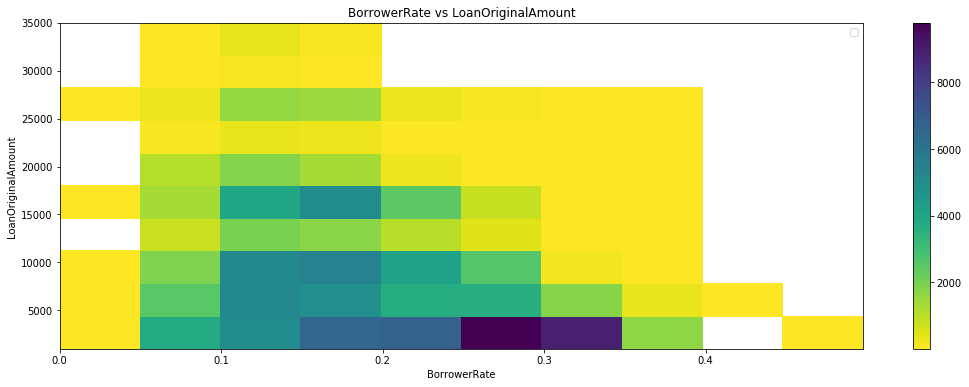

In [46]:
#Representing info  heatmap 

plt.figure(figsize = [18, 6])

plt.hist2d(data = LoanData_df,x='BorrowerRate',y='LoanOriginalAmount',cmin=0.1,cmap='viridis_r')
plt.colorbar()
plt.legend()
plt.title('BorrowerRate vs LoanOriginalAmount')
plt.xlabel('BorrowerRate')
plt.ylabel('LoanOriginalAmount');

This shows that majority of the loans borrowed comes with Borrowrate within 0.3 percent.

(-4763.518268119509, 39295.801683112964)

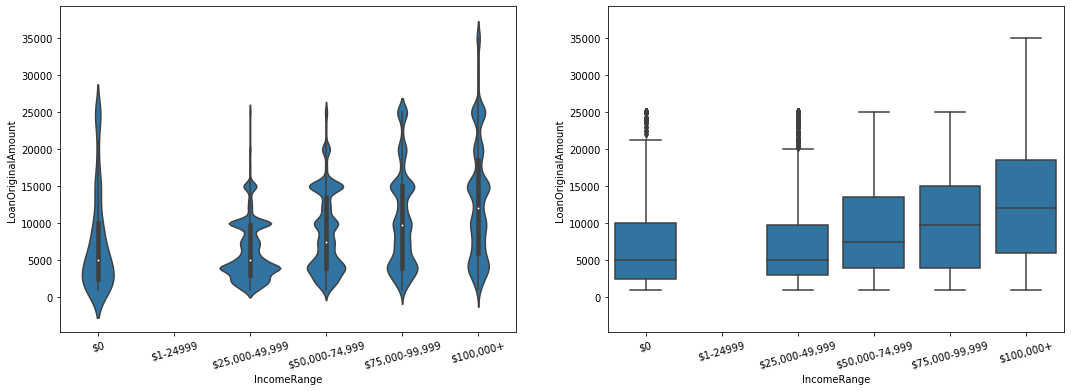

In [31]:
# TWO PLOTS IN ONE FIGURE


plt.figure(figsize = [18, 6])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=LoanData_df, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=LoanData_df, x='IncomeRange', y='LoanOriginalAmount',  color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

>The IncomeRange of 100,000 +, has a 25%,50% and 75% LoanOriginalAmount at 6000,12000,185000 respectively.

> While no Loan was given to the loan borrowers within $1 - 24999

In [56]:
LoanData_df.groupby("IncomeRange")["LoanOriginalAmount"].describe()

count          mean          std     min     25%      50%  \
IncomeRange                                                                   
$0                621.0   7410.930757  6805.673221  1000.0  2500.0   5000.0   
$1-24999            0.0           NaN          NaN     NaN     NaN      NaN   
$25,000-49,999  32192.0   6177.987140  4045.435714  1000.0  3000.0   5000.0   
$50,000-74,999  31050.0   8675.275781  5436.771645  1000.0  4000.0   7500.0   
$75,000-99,999  16916.0  10365.923741  6625.160026  1000.0  4000.0   9700.0   
$100,000+       17337.0  13073.127300  8075.860275  1000.0  6000.0  12000.0   

                    75%      max  
IncomeRange                       
$0              10000.0  25000.0  
$1-24999            NaN      NaN  
$25,000-49,999   9800.0  25000.0  
$50,000-74,999  13500.0  25000.0  
$75,000-99,999  15000.0  25000.0  
$100,000+       18500.0  35000.0

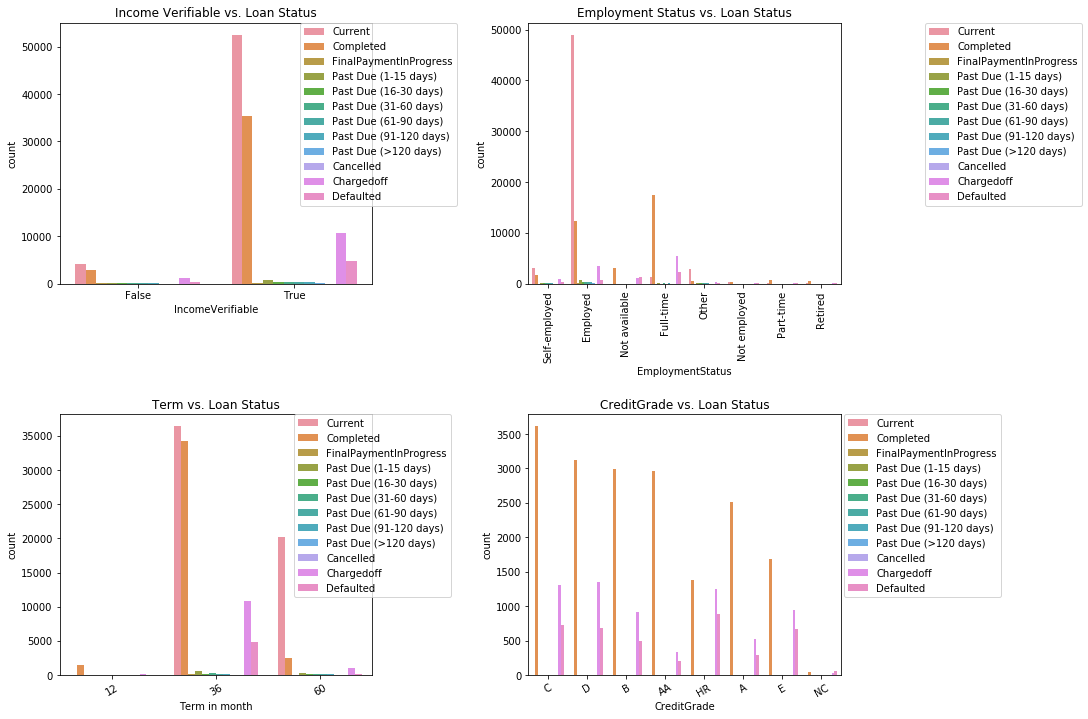

In [95]:
# Looking at the relationship between LoanStatus and other variables

plt.figure(figsize=[14, 12])

#subplot 1
plt.subplot(2,2,1)
sb.countplot(data = LoanData_df, x = 'IncomeVerifiable', hue = 'LoanStatus')
plt.legend(bbox_to_anchor=(1.27, 1),borderaxespad=0) 
plt.title('Income Verifiable vs. Loan Status');


#subplot 2
plt.subplot(2,2,2)
sb.countplot(data = LoanData_df, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.27, 1),borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

#subplot 3
plt.subplot(2,2,3)
sb.countplot(data = LoanData_df, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(0.75, 1),borderaxespad=0)
plt.xlabel('Term in month')
plt.title('Term vs. Loan Status');

#subplot 4
plt.subplot(2,2,4)
sb.countplot(data = LoanData_df, x = 'CreditGrade', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('CreditGrade vs. Loan Status');

plt.subplots_adjust(wspace=0.50,hspace=0.5);

The following insights can be gotten from the above visuals;

>Verified borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

>Employed borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.



In [75]:
LoanData_df.head()

EmploymentStatus     Occupation LoanStatus  StatedMonthlyIncome  \
0    Self-employed          Other  Completed          3083.333333   
1         Employed   Professional    Current          6125.000000   
2    Not available          Other  Completed          2083.333333   
3         Employed  Skilled Labor    Current          2875.000000   
4         Employed      Executive    Current          9583.333333   

   IncomeVerifiable  LoanOriginalAmount  LoanOriginationDate CreditGrade  \
0              True                9425  2007-09-12 00:00:00           C   
1              True               10000  2014-03-03 00:00:00         NaN   
2              True                3001  2007-01-17 00:00:00          HR   
3              True               10000  2012-11-01 00:00:00         NaN   
4              True               15000  2013-09-20 00:00:00         NaN   

   IsBorrowerHomeowner     IncomeRange  Term  AvailableBankcardCredit  \
0                 True  $25,000-49,999    36                   1500.0   
1                False  $50,000-74,999    36                  10266.0   
2                False   Not displayed    36                      NaN   
3                 True  $25,000-49,999    36                  30754.0   
4                 True       $100,000+    36                    695.0   

   BorrowerRate BorrowerState  
0        0.1580            CO  
1        0.0920            CO  
2        0.2750            GA  
3        0.0974            GA  
4        0.2085            MN

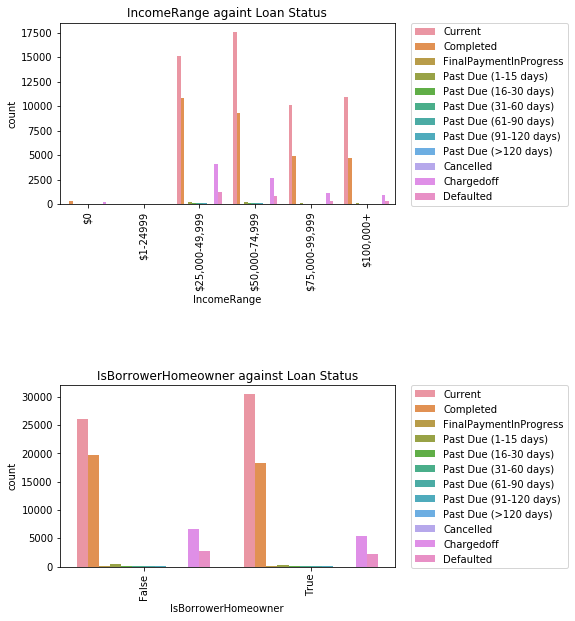

In [96]:
# Looking at more relationships between LoanStatus and other variables

plt.figure(figsize=[6, 10])
#subplot 5
plt.subplot(2,1,1)
sb.countplot(data = LoanData_df, x = 'IncomeRange', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1),
           borderaxespad=0)
plt.title('IncomeRange againt Loan Status');

#subplot 6
plt.subplot(2,1,2)
sb.countplot(data = LoanData_df, x = 'IsBorrowerHomeowner', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1),borderaxespad=0)
plt.title('IsBorrowerHomeowner against Loan Status');

plt.subplots_adjust(hspace=1)

Insights gotten from the above visuals;
>Borrowers with income range of $25,000-74,999 got more loans while majority of the loans allocated went to mostly borrowers with current and completed loan status.

> This shows that a home owner is very more likely to get a loan compared to a intended borrower without a home.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> IncomeRange and LoanOriginalAmount are closely related because the charts shows a higher loan amount for higher earners.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [111]:
LoanData_df.head(2)

EmploymentStatus    Occupation LoanStatus  StatedMonthlyIncome  \
0    Self-employed         Other  Completed          3083.333333   
1         Employed  Professional    Current          6125.000000   

   IncomeVerifiable  LoanOriginalAmount  LoanOriginationDate CreditGrade  \
0              True                9425  2007-09-12 00:00:00           C   
1              True               10000  2014-03-03 00:00:00         NaN   

   IsBorrowerHomeowner     IncomeRange  Term  AvailableBankcardCredit  \
0                 True  $25,000-49,999    36                   1500.0   
1                False  $50,000-74,999    36                  10266.0   

   BorrowerRate BorrowerState  
0         0.158            CO  
1         0.092            CO

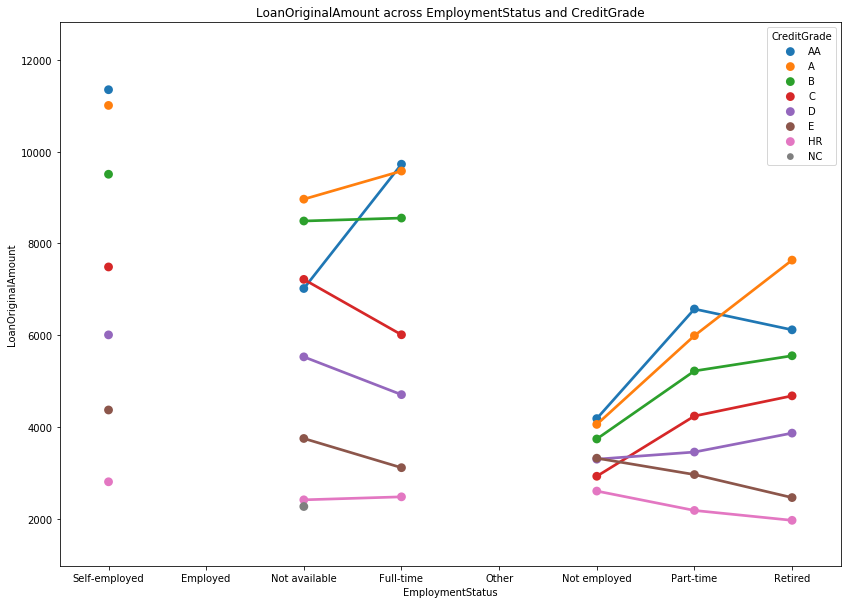

In [99]:
# Analysis on LoanOriginalAmount, EmploymentStatus and CreditGrade
CreditGrade=LoanData_df['CreditGrade'].sort_values(ascending=False)
fig = plt.figure(figsize=[14,10])
sb.pointplot(data=LoanData_df, x='EmploymentStatus', y='LoanOriginalAmount', hue='CreditGrade', errwidth=0)
plt.xlabel('EmploymentStatus')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount across EmploymentStatus and CreditGrade')
plt.legend(title='CreditGrade')
plt.show()

From the chart above, the self employeed group take more loans than the full-time workers in all categories of CreditGrade.

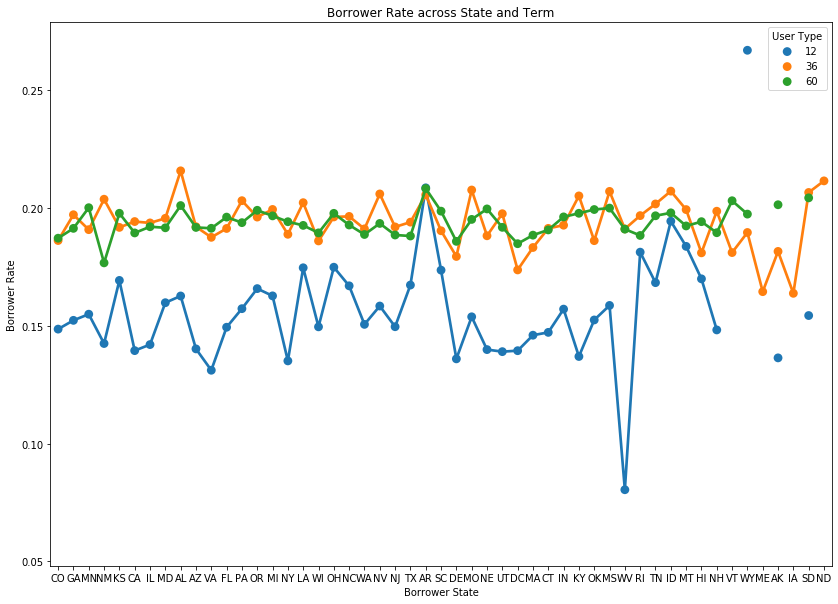

In [35]:
# Analysis on CreditGrade, BorrowerRate and Term
fig = plt.figure(figsize=[14,10])
sb.pointplot(data=LoanData_df, x='BorrowerState', y='BorrowerRate', hue='Term', errwidth=0)
plt.xlabel('Borrower State')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate across State and Term')
plt.legend(title='User Type')
plt.show()

The above chart clearly shows that the relationship between BorrowerRate and Borrower State across the 3 term types. From the chat TX is seen to pay more in rate for 12 and 36 months period.

In [47]:
LoanData_df.head()

EmploymentStatus     Occupation LoanStatus  StatedMonthlyIncome  \
0    Self-employed          Other  Completed          3083.333333   
1         Employed   Professional    Current          6125.000000   
2    Not available          Other  Completed          2083.333333   
3         Employed  Skilled Labor    Current          2875.000000   
4         Employed      Executive    Current          9583.333333   

   IncomeVerifiable  LoanOriginalAmount  LoanOriginationDate CreditGrade  \
0              True                9425  2007-09-12 00:00:00           C   
1              True               10000  2014-03-03 00:00:00         NaN   
2              True                3001  2007-01-17 00:00:00          HR   
3              True               10000  2012-11-01 00:00:00         NaN   
4              True               15000  2013-09-20 00:00:00         NaN   

   IsBorrowerHomeowner     IncomeRange  Term  AvailableBankcardCredit  \
0                 True  $25,000-49,999    36                   1500.0   
1                False  $50,000-74,999    36                  10266.0   
2                False   Not displayed    36                      NaN   
3                 True  $25,000-49,999    36                  30754.0   
4                 True       $100,000+    36                    695.0   

   BorrowerRate BorrowerState  
0        0.1580            CO  
1        0.0920            CO  
2        0.2750            GA  
3        0.0974            GA  
4        0.2085            MN

In [106]:
#Defined a function for graph plotting

def graphplot(Data,x_axis,y_axis,hue):
    data=Data
    x=x_axis
    y=y_axis
    hue=hue
    sb.pointplot(data=data, x=x, y=y, hue=hue, errwidth=0)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('%s across %s and %s'%(y,x,hue))
    plt.legend(title='Term')
    plt.show()

In [104]:
graphplot(LoanData_df,'IsBorrowerHomeowner','LoanOriginalAmount','Term')

This shows that the loan original amount is way lesser for borrower's that don't own a house through out the term period.

In [68]:
LoanData_df.head()

EmploymentStatus     Occupation LoanStatus  StatedMonthlyIncome  \
0    Self-employed          Other  Completed          3083.333333   
1         Employed   Professional    Current          6125.000000   
2    Not available          Other  Completed          2083.333333   
3         Employed  Skilled Labor    Current          2875.000000   
4         Employed      Executive    Current          9583.333333   

   IncomeVerifiable  LoanOriginalAmount  LoanOriginationDate CreditGrade  \
0              True                9425  2007-09-12 00:00:00           C   
1              True               10000  2014-03-03 00:00:00         NaN   
2              True                3001  2007-01-17 00:00:00          HR   
3              True               10000  2012-11-01 00:00:00         NaN   
4              True               15000  2013-09-20 00:00:00         NaN   

   IsBorrowerHomeowner     IncomeRange  Term  AvailableBankcardCredit  \
0                 True  $25,000-49,999    36                   1500.0   
1                False  $50,000-74,999    36                  10266.0   
2                False   Not displayed    36                      NaN   
3                 True  $25,000-49,999    36                  30754.0   
4                 True       $100,000+    36                    695.0   

   BorrowerRate BorrowerState  
0        0.1580            CO  
1        0.0920            CO  
2        0.2750            GA  
3        0.0974            GA  
4        0.2085            MN

In [71]:
LoanData_df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [105]:
graphplot(LoanData_df,'IsBorrowerHomeowner','BorrowerRate','Term')

>This shows that the Loan rate is higher for borrowers who are not home owners.

In [66]:
LoanData_df.head()

EmploymentStatus     Occupation LoanStatus  StatedMonthlyIncome  \
0    Self-employed          Other  Completed          3083.333333   
1         Employed   Professional    Current          6125.000000   
2    Not available          Other  Completed          2083.333333   
3         Employed  Skilled Labor    Current          2875.000000   
4         Employed      Executive    Current          9583.333333   

   IncomeVerifiable  LoanOriginalAmount  LoanOriginationDate CreditGrade  \
0              True                9425  2007-09-12 00:00:00           C   
1              True               10000  2014-03-03 00:00:00         NaN   
2              True                3001  2007-01-17 00:00:00          HR   
3              True               10000  2012-11-01 00:00:00         NaN   
4              True               15000  2013-09-20 00:00:00         NaN   

   IsBorrowerHomeowner     IncomeRange  Term  AvailableBankcardCredit  \
0                 True  $25,000-49,999    36                   1500.0   
1                False  $50,000-74,999    36                  10266.0   
2                False             NaN    36                      NaN   
3                 True  $25,000-49,999    36                  30754.0   
4                 True       $100,000+    36                    695.0   

   BorrowerRate BorrowerState  LoanMonth  
0        0.1580            CO          9  
1        0.0920            CO          3  
2        0.2750            GA          1  
3        0.0974            GA         11  
4        0.2085            MN          9

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> there is noticeable differences between rates at 12months and 60months across all states


### Were there any interesting or surprising interactions between features?

> The Employed status having no value, it more likely the status was mistakenly left in the dataset.
> Loan rate is different across states

## Conclusions
> Borrower's salary range, State ,employment status are all factors that affect loans issued and rates of loans
